In [1]:
import pandas as pd
import altair as alt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from math import sqrt

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
data = pd.read_csv('./player_stats.csv')
data.columns

data.rename(columns={'name': 'player_id'}, inplace=True)


# need to add/remove player_id when using to_numeric further down
important_columns = ['2B', '3B', 'AB', 'Age', 'BA', 'BB', 'H', 'HR', 'OBP',
                     'OPS', 'OPS+', 'PA', 'R', 'RBI', 'SB', 'SLG', 'SO', 'TB',
                     'Year']

In [4]:
cleaned_data = data[important_columns].dropna()

for column in important_columns:
    cleaned_data[column] = pd.to_numeric(cleaned_data[column], errors = 'coerce')

# chose data from the more "modern" era of baseball
finalized_data = cleaned_data[cleaned_data['Year'] > 2000]
# chose data from players who had at least 100 plate appearences to ensure significance
final_data = finalized_data[finalized_data['PA'] > 99]

C:\Users\colin\Anaconda3\lib\site-packages\altair\utils\core.py:294: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  attrs['type'] = infer_vegalite_type(data[attrs['field']])


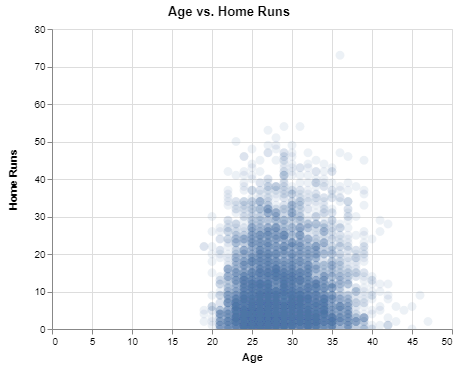

In [5]:
alt.Chart(final_data.sample(4999)).mark_circle(size = 80, opacity = 0.1).encode(
    alt.X('Age', title = "Age"),
    alt.Y('HR', title = "Home Runs"),
).properties(title= "Age vs. Home Runs"
).interactive(
)

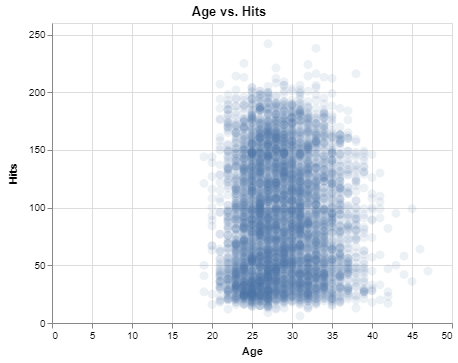

In [6]:
alt.Chart(final_data.sample(4999)).mark_circle(size = 80, opacity = 0.1).encode(
    alt.X('Age', title = "Age"),
    alt.Y('H', title = "Hits"),
).properties(title= "Age vs. Hits"
).interactive(
)

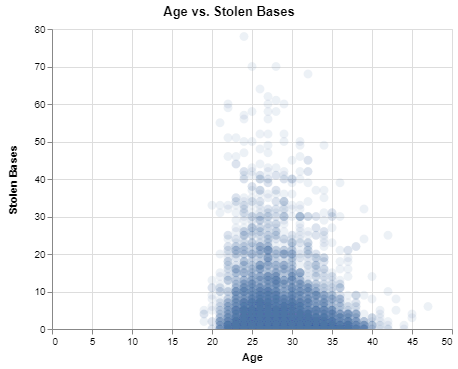

In [7]:
alt.Chart(final_data.sample(4999)).mark_circle(size = 80, opacity = 0.1).encode(
    alt.X('Age', title = "Age"),
    alt.Y('SB', title = "Stolen Bases"),
).properties(title= "Age vs. Stolen Bases"
).interactive(
)

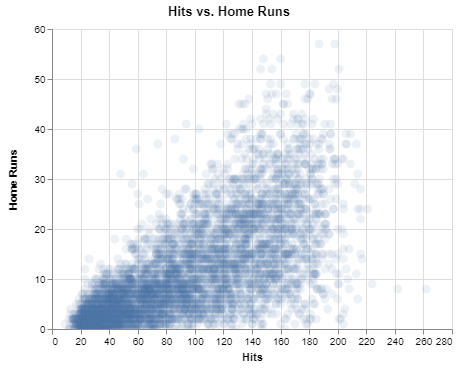

In [8]:
alt.Chart(final_data.sample(4999)).mark_circle(size = 80, opacity = 0.1).encode(
    alt.X('H', title = "Hits"),
    alt.Y('HR', title = "Home Runs"),
).properties(title= "Hits vs. Home Runs"
).interactive(
)

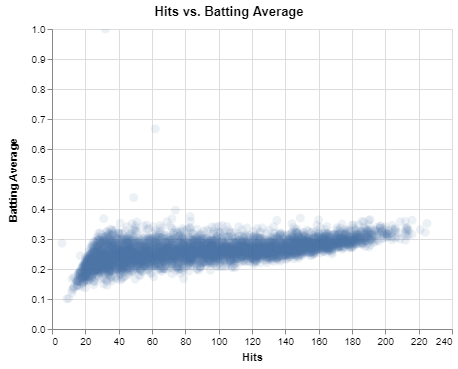

In [9]:
alt.Chart(final_data.sample(4999)).mark_circle(size = 80, opacity = 0.1).encode(
    alt.X('H', title = "Hits"),
    alt.Y('BA', title = "Batting Average"),
).properties(title= "Hits vs. Batting Average"
).interactive(
)